## MSDS 7331 Data Mining: Project1

***  

Team: Andrew Abbott, Vivek Bejugama, Patrick McDevitt, Preeti Swaminathan 


***

## Business Understanding


This dataset was 
Abstract: This dataset summarizes a  about articles published by Mashable in a period of two years. 
	
We are using online news popularity dataset from UCI machine learning repository. The dataset is a collection of 61 heterogeneous set of features of approximately 40,000 articles published by Mashable (www.mashable.com) - the features are not the articles, but features extracted from the article, such as word counts, title word counts, keyword associations.  The data represents a two year period of published articles, ending in January 2015.  

We intend to mine this data to understand what parameters can influence an article to be shared on social media more than others.  The goal is to predict the number of shares in social networks (popularity).  

The business use of this data set / data mining project is ultimately to establish relationships that enable to predict how many social media shares an article published on _www.mashable.com_ is likley to generate - with the idea that a more socially shared article has higher business value - increasing traffic to the site, and consequently, potential for higher earnings revenue associated to the increased web traffic. The user of this model is both the publishers for _mashable.com_ for article selection, and also for authors, attempting to create content that has higher value on sites like _mashable.com_.  

Measures for a successful outcome from a predictive model for this study will be based on overall accuracy metrics (e.g., confusion matrix), as well as AUC type metrics. A baseline (non-predictive, random) scoring will establish a baseline for these metrics, and then the predictive model can be assessed against a random model for measurement of improvement, i.e., value of the model.  

The data is located at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity  

***  
__Citation Request__ :  
***  
K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.  
***  




*** 

## Data Understanding 

***  

#### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.  

Attribute Information:

     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

In [4]:
#importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import seaborn as sns

In [6]:
#Import Data from .csv file

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... change directory as needed to point to local data file 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
df = pd.read_csv('../data/OnlineNewsPopularity.csv')  


# Strip leading spaces and store all the column names to a list
df.columns = df.columns.str.strip()
#col_names = df.columns.values.tolist()




In [7]:
# Summary of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

#### Verify data quality
- Explain any missing values, duplicate data, and outliers
- Are those mistakes?
- How do you deal with these problems? Be specific.  

- Using the standard read.csv function, all the variables are imported as data type float64. Many of the values are more logically integer (counts) or boolean (e.g., is_weekend). We will  convert those fields to data types appropriate to their nature.

- Using the 'duplicated' function in python, we confirmed that there are no duplicated data in this data set.
- Using standard python functions, we can also see that there are no missing values for any of the data cells either.  

- So, those two traditional questions in the data cleaning phase do not need any specific action for this data set.

- There are, however, outliers in most of the data columns. Based on observation from scatter plots, histograms, and the evaluation of descriptive statistics (especially skewness) we consider to transform all of the variables with high right-skewness (i.e., skewness > 1) using a log transformation. Since the purpose of this data set and evaluation is eventually to build predictive model for article popularity, using regression-type analyses methods, performing log transform on right skewed data is typically beneficial in improving the usefulness of that type data in regression analyses.

- Subsequent to performing the log transform, we can further evaluate for outliers in that tranformed data space.


In [8]:
# Check for duplicates
df[df.duplicated()]

# Converting the data type to Integer
to_int = ['timedelta','n_tokens_title', 'n_tokens_content','num_keywords',
          'num_hrefs','num_self_hrefs', 'num_imgs', 'num_videos','shares' ]
df[to_int] = df[to_int ].astype(np.int64)


#### Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting.  
- Explain the significance of the statistics run and why they are meaningful.   

#### Create new features from existing data set  

- Based on inspection of the data set, we ideitified several opportunities to create some useful features from the original data set.

- The first data field, _url_, is the url address of the mashable published article, which contains in the link the year, month, day that the article was published and also the article title. We will use a string splitting function to parse the information in the url address to create the additional data columns : _year_, _month_, _day_, and _title_. Further, we can then combine the parsed year, month, day into a _published_date_ column. Although the original data set does contain the field _timedelta_ which provdes essentially a timeline of article publication dates, it does not contain the actual date of publication. We consider that having the actual date may prove useful to provide context or linkage with external data sources. We are not, at this time, linking in any additional external data sources, but that may be an opportunity with future work. In addition, we consider to storethe _title_ as a distinct data column, but we are not performing any analysis on that field at this time. We consider that the article title is an opportunity for text mining in the classification problem to be evaluated also with future work.  

- The data fields : _is_entertainment_, _is_lifestyle_, ... are each boolean indicators of the type of data channel associated to the published article. Since these are mutually exclusive binary indicators, we can combine into one common feature, _data_channel_, to condense the information of those 6 columns into one column. This provides some reduction in complexity of the data set, and also provides opportunity to more easily make comparison plots for the relative popularity of these data channels.  

- Similar to the _data_channel_ column, there is also a set of columns : _is_monday_, _is_tuesday_, ... which are also a set of mutually exclusive binary indicators. Using the same logic as above, we combine those values into a single column _day_of_week_. There is an additional column _is_weekend_ which we retain for now, as that provides opportunity to evaluate if weekend responses are different than weekday responses.  

- And finally, we also created a column to be used as binary popularity measure. Based on the business description of the goal, the goal is to build a model that provides predictive capability of article 'popular' or 'not popular', based on the metric of number of shares > 1400 (popular) or number of shares < 1400 (not popular). The value of 1400 was provided in the business statement, and is also the median value of the number of shares in the experience of this data set. To accomplish that purpose, we create a new column (binary) _popularity_ which is based on the number of shares reported in the _shares_ data column. This can be used in future work, e.g., in classificiation or binary logistic regression analyses to support the business goal.  

- The code to accomplish all of the above is shown here below.  

***  


In [5]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Extract useable elemnts from the string URL
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
df['http'], df['blank'], df['mash'], df['year'], df['month'], df['day'], df['title'], df['extra'] = df['url'].str.split('\/', 7).str

del df['http'],df['blank'],df['mash'],df['extra']

# Derive date column from year-month-day fields
df['year']  = (df['year']).astype(str)
df['month'] = (df['month']).astype(str)
df['day']   = (df['day']).astype(str)
df['publish_date'] = pd.to_datetime(df.year + df.month + df.day, format = "%Y%m%d")

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Creating day_of_week categorical variable
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
df['day_of_week'] = 'Mon'

tuesday = df['weekday_is_tuesday'] == 1
df.loc[tuesday, 'day_of_week'] = 'Tue'

wednesday = df['weekday_is_wednesday'] == 1
df.loc[wednesday, 'day_of_week'] = 'Wed'

thursday = df['weekday_is_thursday'] == 1
df.loc[thursday, 'day_of_week'] = 'Thu'

friday = df['weekday_is_friday'] == 1
df.loc[friday, 'day_of_week'] = 'Fri'

saturday = df['weekday_is_saturday'] == 1
df.loc[saturday, 'day_of_week'] = 'Sat'

sunday = df['weekday_is_sunday'] == 1
df.loc[sunday, 'day_of_week'] = 'Sun'

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... creating data_channel categorical variable
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
df['data_channel'] = np.NaN

condition = df['data_channel_is_lifestyle'] == 1
df.loc[condition, 'data_channel'] = 'Lifestyle'

condition = df['data_channel_is_entertainment'] == 1
df.loc[condition, 'data_channel'] = 'Entertainment'

condition = df['data_channel_is_bus'] == 1
df.loc[condition, 'data_channel'] = 'Business'

condition = df['data_channel_is_socmed'] == 1
df.loc[condition, 'data_channel'] = 'SocMed'

condition = df['data_channel_is_tech'] == 1
df.loc[condition, 'data_channel'] = 'Tech'

condition = df['data_channel_is_world'] == 1
df.loc[condition, 'data_channel'] = 'World'

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Popularity Variable . Article is considerd popular if it has more than 1400 shares. 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df['popularity'] = np.where(df['shares']>1400, True, False)


#### Data Selection - First evaluation  

- There are 60 columns in the original data set; we added a few additonal columns based on observed opportunities (e.g., _publication_date_, ...) as explained above. 
    
- From this data set, we did a simple correlation matrix to look for variables that are highly correlated with each other that could be removed with little loss of information.

- With that downselection, we proceeded with additional evaluation of these remaining variables.
    
- we recognize that there is likely significant additional opportunity for modeling improvements with many of the remaining variables, and will look to re-expand the data set to further consider that with future work.  

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


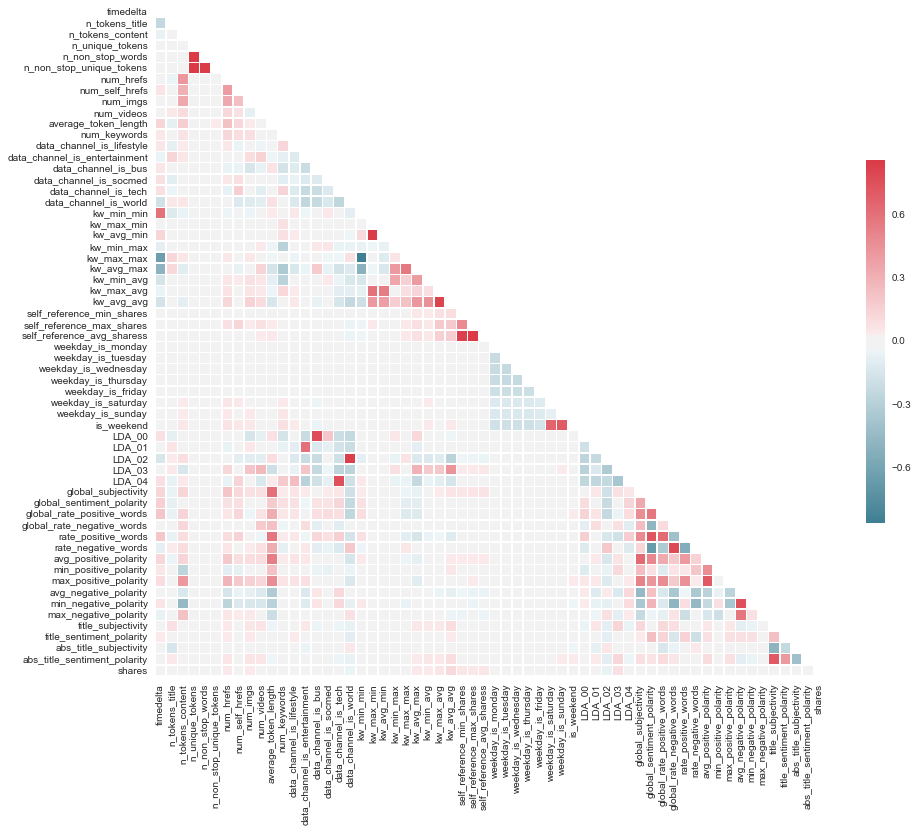

In [9]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# from example found at https://www.kaggle.com/maheshdadhich/strength-of-visualization-python-visuals-tutorial/notebook

Using the correlation matrix above along with judgement we removed the following variables:
- 'url': parsed into new variables
- 'timedelta': not predictive
- 'num_self_hrefs': 
- 'n_unique_tokens':
- 'average_token_length': high correlation with mutliple other variables
- 'kw_min_min': 
- 'LDA_03': LDAs are all related, limited to 0, 1, 2
- 'LDA_04': LDAs are all related, limited to 0, 1, 2
- 'global_subjectivity': high correlation with mutliple other variables
- 'min_positive_polarity'
- 'max_positive_polarity'
- 'min_negative_polarity'
- 'max_negative_polarity'
- 'global_sentiment_polarity'
- 'n_non_stop_words'
- 'n_non_stop_unique_tokens': 
- 'kw_max_min'
- 'kw_avg_min'
- 'kw_min_max'
- 'kw_max_max'
- 'kw_avg_max'
- 'kw_min_avg'
- 'kw_max_avg'
- 'rate_negative_words'
- 'avg_positive_polarity'
- 'self_reference_min_shares'
- 'weekday_is_saturday'
- 'weekday_is_sunday'
- 'self_reference_max_shares'
- 'title_subjectivity'
- 'shares'
- 'rate_positive_words'
- 'abs_title_sentiment_polarity'

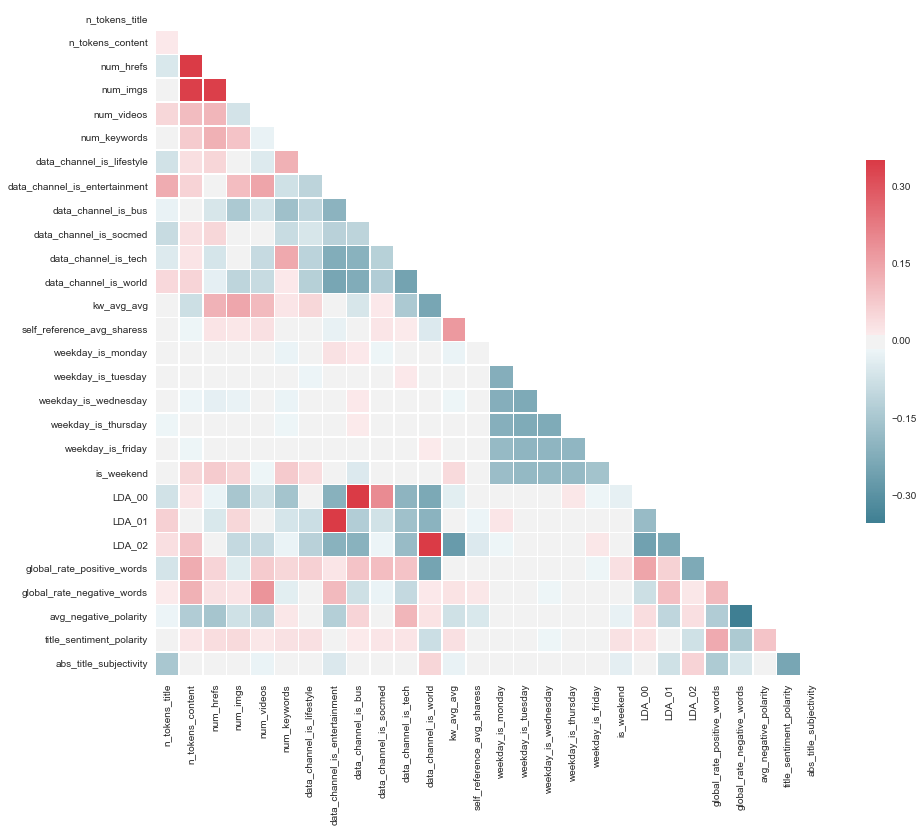

In [10]:
# Clasifing Atributes for easy analysis 
dropped_features = ['url','timedelta','num_self_hrefs','n_unique_tokens','average_token_length','kw_min_min','LDA_03','LDA_04',
                    'global_subjectivity','min_positive_polarity','max_positive_polarity',
                    'min_negative_polarity','max_negative_polarity','global_sentiment_polarity',
                    'n_non_stop_words','n_non_stop_unique_tokens','kw_max_min','kw_avg_min',
                    'kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg',
                    'rate_negative_words','avg_positive_polarity','self_reference_min_shares',
                    'weekday_is_saturday','weekday_is_sunday','self_reference_max_shares','title_subjectivity',
                    'shares','rate_positive_words','abs_title_sentiment_polarity']

df1 = df.drop(dropped_features, axis = 1)


# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The new correlation matrix shows negative correlations between the indicators but is much more manageable in size.

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39643
Data columns (total 28 columns):
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
num_hrefs                        39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null float64
data_channel_is_tech             39644 non-null float64
data_channel_is_world            39644 non-null float64
kw_avg_avg                       39644 non-null float64
self_reference_avg_sharess       39644 non-null float64
weekday_is_monday                39644 non-null float64
weekday_is_tuesday               39644 non-null float64
weekday

In [12]:

imp_features = ['n_tokens_title',
 'n_tokens_content',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'num_keywords',
 'kw_avg_avg',
 'self_reference_avg_sharess',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'avg_negative_polarity',
 'title_sentiment_polarity',
 'abs_title_subjectivity']

/home/mcdevitt/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  


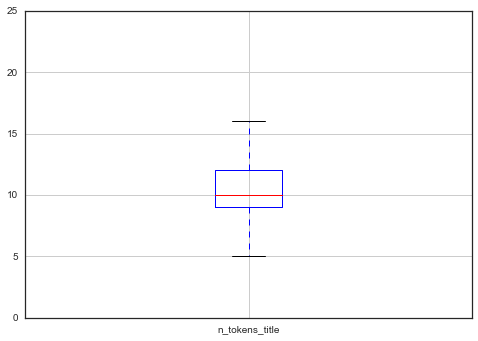

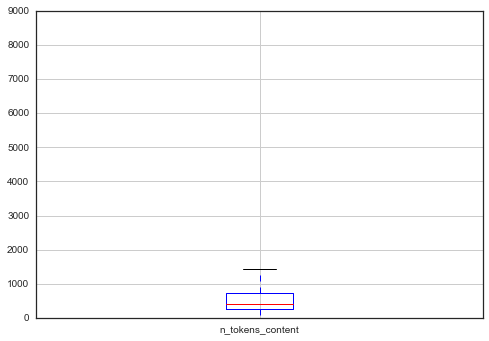

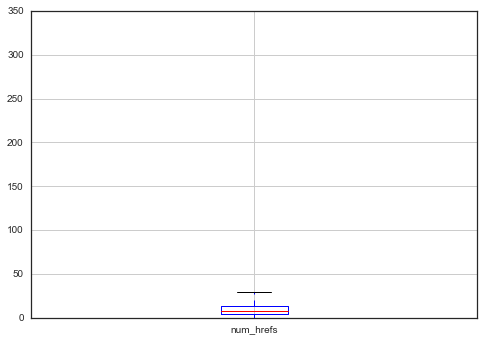

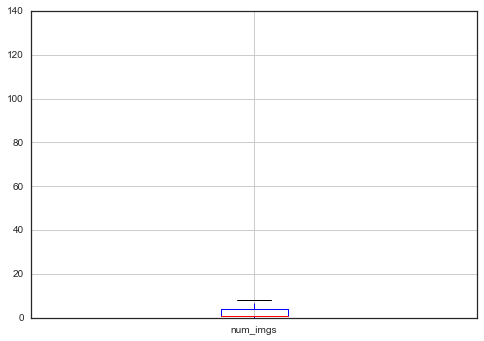

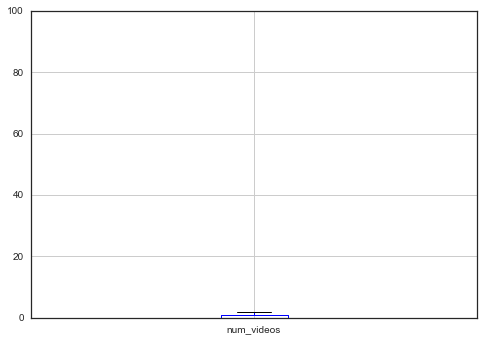

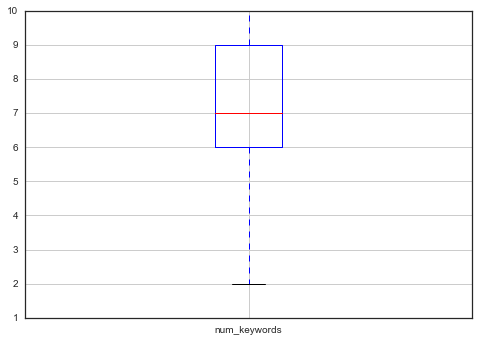

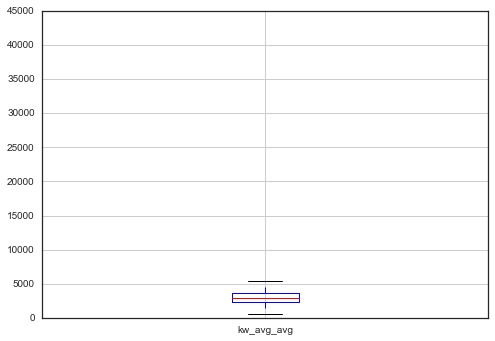

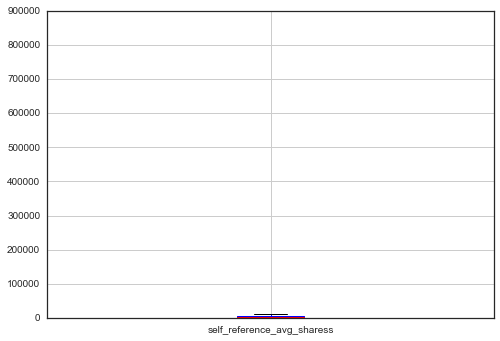

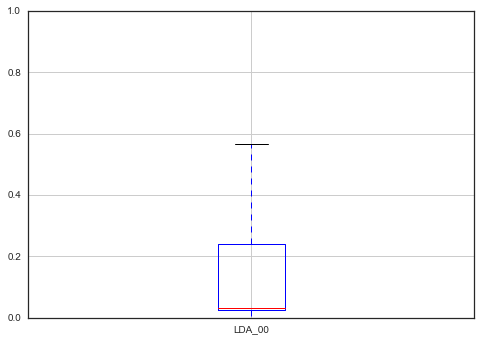

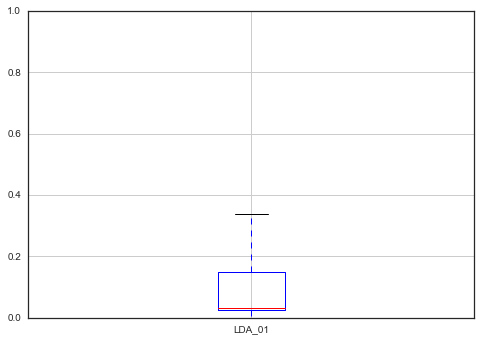

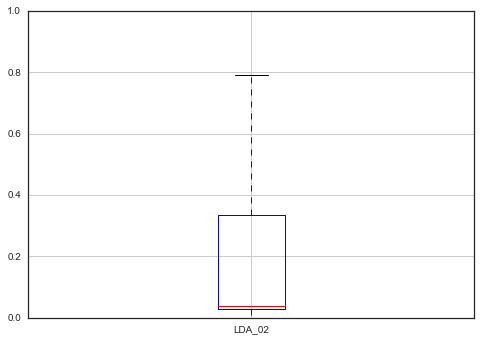

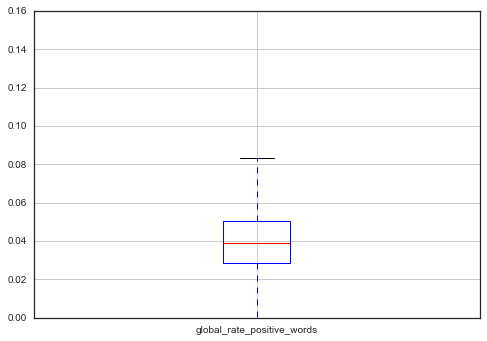

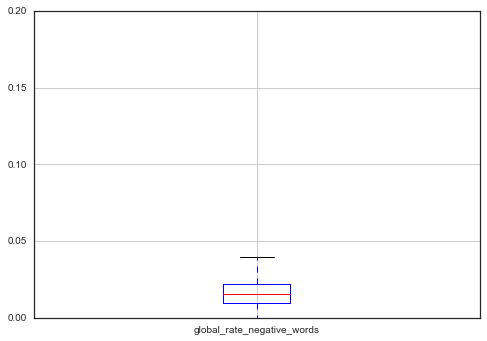

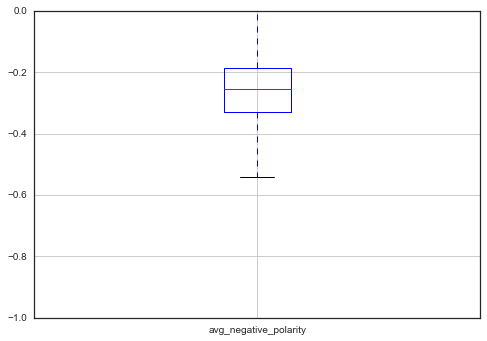

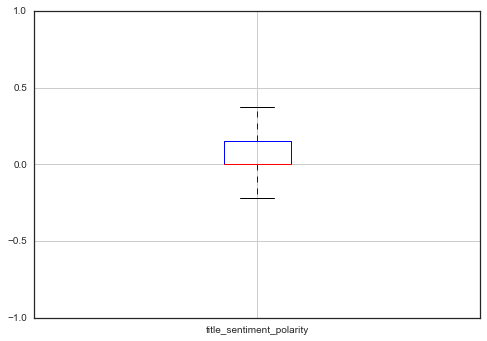

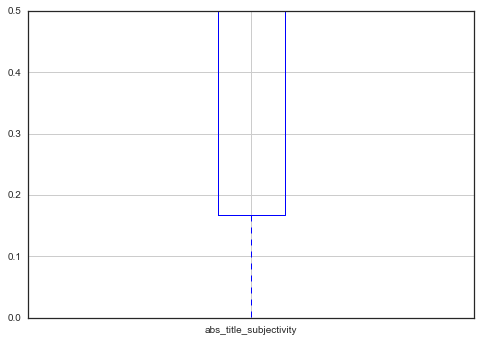

In [13]:
for var in imp_features:
    df1.boxplot(column = var)
    plt.show()

After looking at the boxplots of these variables it is evident that many are heavily skewed. Before they are used for prediction a log transformation would be beneficial. The following bit of code makes those transformations, creating new variables.

In [23]:
# ---------------------------------
# Log transform variables with high skewness
# ---------------------------------

log_features = ['n_tokens_content',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'kw_avg_avg',
 'self_reference_avg_sharess',]

df1 = df

# store min value for each column
df_mins = df1[log_features].min()

for column in log_features:
    sk = df1[column].skew()
    if(sk > 1):
        new_col_name = 'ln_' + column
        print (column, sk, new_col_name)
        if df_mins[column] > 0:
            df1[new_col_name] = np.log(df1[column])
        elif df_mins[column] == 0:
            df_tmp = df1[column] + 1
            df1[new_col_name] = np.log(df_tmp)
        else:
            print('--> Log transform not completed :', column, '!!')

n_tokens_content 2.94542193879 ln_n_tokens_content
num_hrefs 4.0134948282 ln_num_hrefs
num_imgs 3.94659584465 ln_num_imgs
num_videos 7.0195327863 ln_num_videos
kw_avg_avg 5.76017729162 ln_kw_avg_avg
self_reference_avg_sharess 17.9140933777 ln_self_reference_avg_sharess


/home/mcdevitt/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  


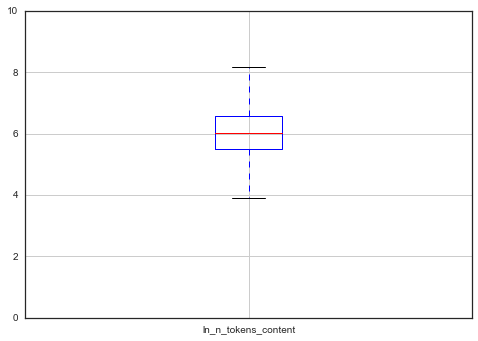

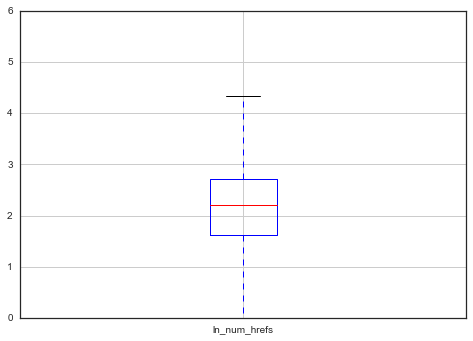

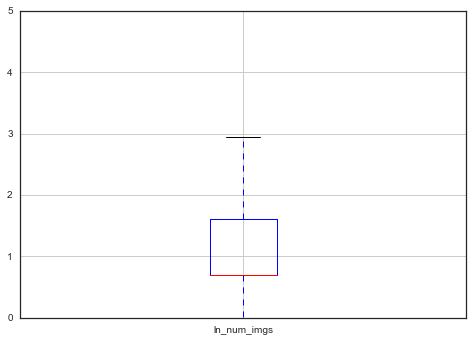

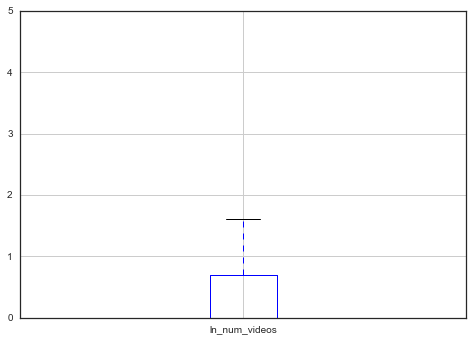

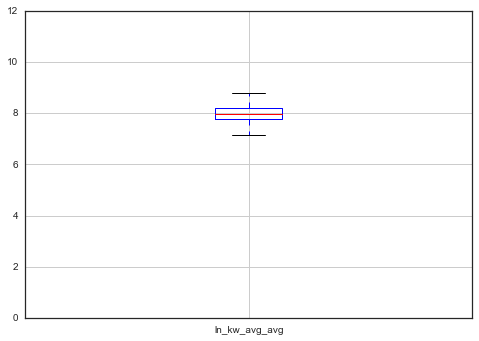

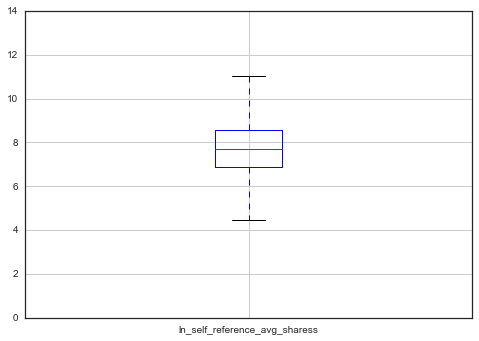

In [15]:
log_var = ['ln_n_tokens_content', 'ln_num_hrefs', 'ln_num_imgs',
 'ln_num_videos', 'ln_kw_avg_avg','ln_self_reference_avg_sharess']


for var in log_var:
    df1.boxplot(column=var)
    plt.show()

The log variables now look normally distributed with some outliers. 

***  

### Simple Statistics of the Data

***  


In [15]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39643
Data columns (total 67 columns):
url                              39644 non-null object
timedelta                        39644 non-null int64
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null int64
num_self_hrefs                   39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel

***

### Data Visualization

***  


This section contains histograms and cross tabs of several important variables and the popularity rates for each group of variables. The histograms show the distributions of several important variables. 

First is the distribution of the number of words contained in the title. This variable is normally distributed and does not require transformation.

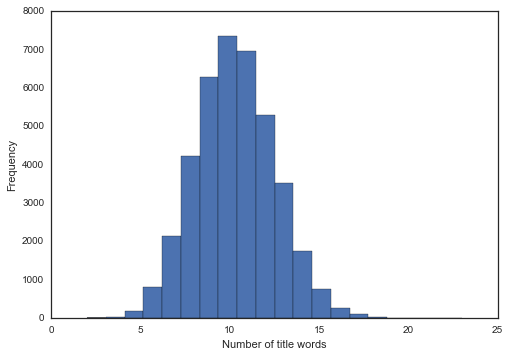

In [17]:
plt.hist(df1['n_tokens_title'], bins = 20)
plt.xlabel('Number of title words')
plt.ylabel('Frequency')
plt.show()

'n_tokens_contant' refers to the number of words in the text of the article. It is reasonable to imagine a relationship between the length of an article and the number of shares it receives.

The distribution of the untransformed data is heavily skewed. the tranformaed distribution below shows the improvement.

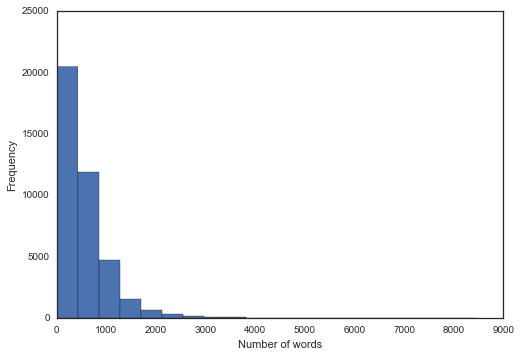

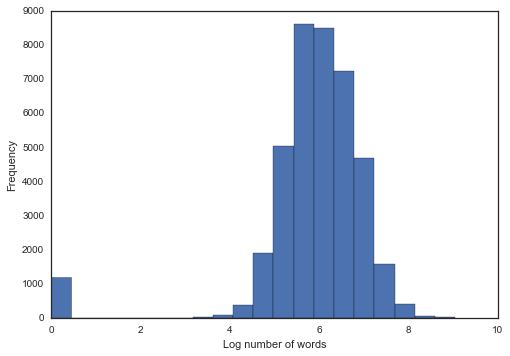

In [18]:
plt.hist(df1['n_tokens_content'], bins = 20)
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

plt.hist(df1['ln_n_tokens_content'], bins = 20)
plt.xlabel('Log number of words')
plt.ylabel('Frequency')
plt.show()

The following bar chart shows the frequencies of each of the data channels in the data. There are at least 2000 of every channel which should aid in classification.

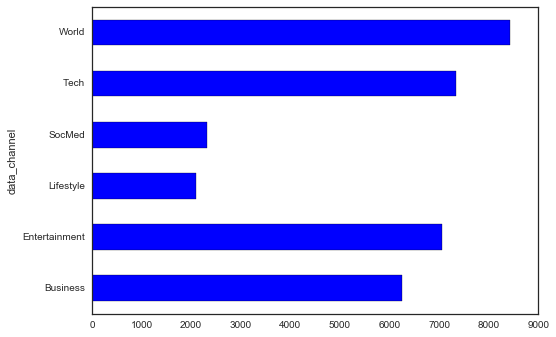

In [24]:
df_channel = df1

df_channel['data_channel'] = np.NaN
condition = df['data_channel_is_lifestyle'] == 1
df_channel.loc[condition, 'data_channel'] = 'Lifestyle'
condition = df['data_channel_is_entertainment'] == 1
df_channel.loc[condition, 'data_channel'] = 'Entertainment'
condition = df['data_channel_is_bus'] == 1
df_channel.loc[condition, 'data_channel'] = 'Business'
condition = df['data_channel_is_socmed'] == 1
df_channel.loc[condition, 'data_channel'] = 'SocMed'
condition = df['data_channel_is_tech'] == 1
df_channel.loc[condition, 'data_channel'] = 'Tech'
condition = df['data_channel_is_world'] == 1
df_channel.loc[condition, 'data_channel'] = 'World'

df_channel = df_channel.groupby(by=['data_channel'])
channel_count = df_channel['data_channel'].count()
channel_count.plot(kind='barh', stacked=True, color = ['blue'])

Another variable which would logically seem to be important for popularity is the global rate of positive words. This is a rate,so is between zero and one, and it is also normally distributed.

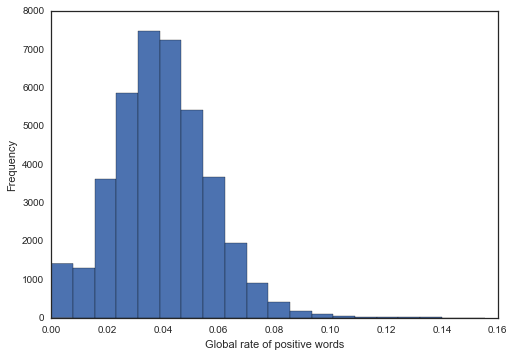

In [20]:
plt.hist(df1['global_rate_positive_words'], bins = 20)
plt.xlabel('Global rate of positive words')
plt.ylabel('Frequency')
plt.show()

#### Explore relationships between attributes.  

##### Look at the attributes - explain nteresting relationships.   

- The data set has features in these 6 broad categories :  
_(ref - see citation reference at beginning of this document)_  
    - Words  
        - Number of words of the title/content  
        - Average word length  
        - Rate of unique/non-stop words of contents
    - Links
        - Number of links  
        - Number of links to other articles in Mashable  
    - Digital Media  
        - Number of images/videos  
    -Time  
        - Day of the week/weekend  
    - Keywords  
        - Number of keywords  
        - Worst/best/average keywords (#shares)  
        - Article category  
    - NLP  
        - Closeness to five LDA topics  
        - Title/Text polarity/subjectivity  
        - Rate and polarity of positive/negative words  
        - Absolute subjectivity/polarity level  
        
As a first exploratory for the relationships among the available variables, we choose to select 9 variables from 4 of the above categories that appear, on the surface, to be highly relevant to the business case objective. 

***  

#### Relationship between word counts and digital media  

In this data set, _tokens_count_ refers to the number of words in the published article. As we wish to understand word counts, image counts, and video counts are likely independent predictors of number of eventual shares, to understand their respective utility in a predictive model, we evaluated scatter plots of (1) number of tokens vs. number of images, (2) number of tokens vs. number of videos and (3) number of images vs. number of videos.  
These are shown in below plots.  
We can make the following observations :
- the data values are generally well populated, with high variability   
- there does not appear to be a strong correlation between any of these sets of variables (potentially good news for future predictive model building)  
- we choose to represent these values in ln-transformed space, due to the very wide range of values in each variables domain, and the strong right-skewness of each distribution  

***  

#### LDA - Latent Dirichlet allocation  
_(ref : https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)_  

LDA (in this context) refers to a method by which a body of text can be scored relative to a vocabulary set that is identified with specific topics. A body of text that discusses Machine Learning, for instance, will use vocabulary specific to that topic, and quite different from another text which discusses do-it-yourself home repair. A text can be scored relative to the similarity of a given LDA scale and then compared among other texts for similarity or difference.  
This data set includes measures for 5 LDA topics, identified here as : _LDA_00_, _LDA_01_, ... and _LDA_04_.  
Similar to the above visualization, we choose to review the relative visual correlation among the LDA scores of these articles via scatter plots, this time with each LDA score plotted against _LDA_00_ (vs. _LDA_01_, _LDA_02_, etc.) and a basic histogram of each individual distribution. These are shown in the below plots.  
We can make the following observations :  
- Each of the historgrams shows a very high frequency at or near the zero axis but also a reasonably sized portion of each population widely distributed along the 0 - 1 axis range of the LDA score. This is (a) expected, and (b) potentially a very positive aspect of the data set for future analysis. This is expected because there are a wide range of topics published on the _mashable_ web-site and each range of topics is expected to have disparate LDA scores. This is potentially useful because it provides a wide-ranging set of diverse measures which may prove to be predictive in the eventual business objective evaluation.  
- Each of the scatter plots shows (of which only 2 are included here, as the remaining are all very similar in nature visually) that there is little correlation between any of two LDA scores. This is also expected (again due to the wide range of _mashable_ topics), but provides visual confidence that the data values provided have good domain range and are likely sufficiently non-correlated as to be useful in model building.  


***  

#### Keywords  and Mashable-refernced hyperlinks  

The data set contains an interesting feature idea for this evaluation. The links that are embedded in each article, prior to publication, are evaluated for the keywords in those links and the number of social media shares associated to those embedded links. These are then scored relative to the success rates of the each of the keywords on a best/avg/worst basis. This is an interesting concept, in essence, to use previous related social media share success / failure keywords as an estimator of a to-be-published article. Since this is an interesting, and potentially useful, feature in this data set, we decided to explore with a simple data view to visualize the relationship between _keywords_avg_max_ and _self_reference_shares_, to verify that the distributions are understood and also that there is non-dependency between features such as _kw_avg_max_ and _self_reference_shares_.  
From this, we observe the following :  
- The histograms shows a reasonably sized portion of each population distributed along the full domain range of each feature. This is a positive characteristic of the data set for future analysis.   
- The scatter plots shows that there is little correlation between the two features, again identifying that these features are likely sufficiently non-correlated as to be useful in model building.  


***  


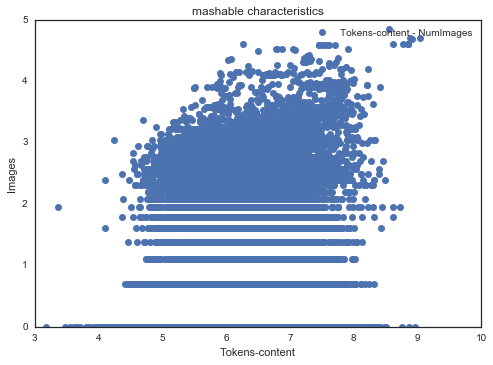

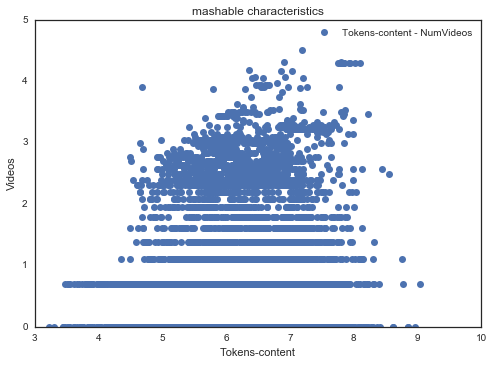

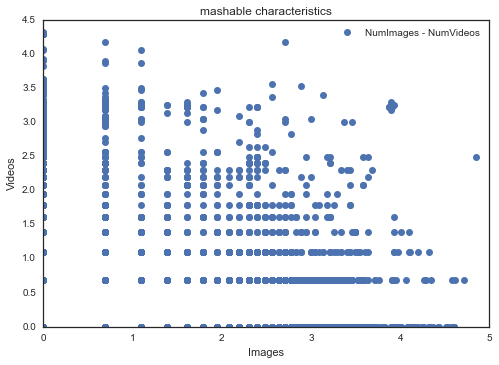

In [21]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Tokens, Images, Videos plots
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
import numpy as np

df1.log_n_tokens = np.log(df1['n_tokens_content'])
df1.log_n_imgs = np.log(df1['num_imgs'])
df1.log_n_videos = np.log(df1['num_videos'])

plt.plot(df1.log_n_tokens, df1.log_n_imgs, label = 'Tokens-content - NumImages', linestyle = 'None', marker = 'o')
plt.xlabel('Tokens-content')
plt.ylabel('Images')
plt.title('mashable characteristics')
plt.legend()
plt.show()

plt.plot(df1.log_n_tokens, df1.log_n_videos, label = 'Tokens-content - NumVideos', linestyle = 'None', marker = 'o')
plt.xlabel('Tokens-content')
plt.ylabel('Videos')
plt.title('mashable characteristics')
plt.legend()
plt.show()

plt.plot(df1.log_n_imgs, df1.log_n_videos, label = 'NumImages - NumVideos', linestyle = 'None', marker = 'o')
plt.xlabel('Images')
plt.ylabel('Videos')
plt.title('mashable characteristics')
plt.legend()
plt.show()


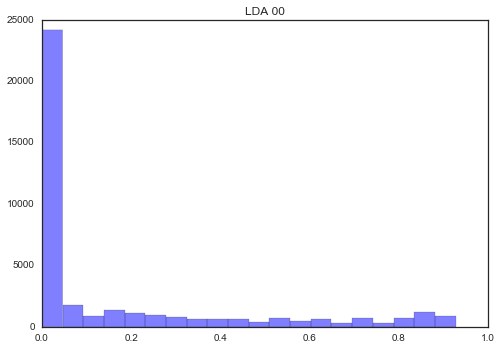

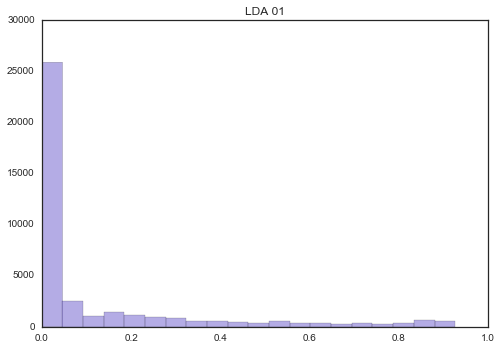

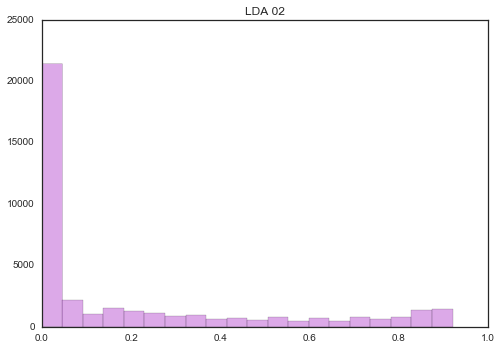

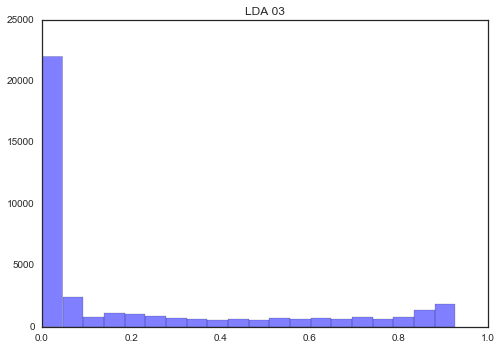

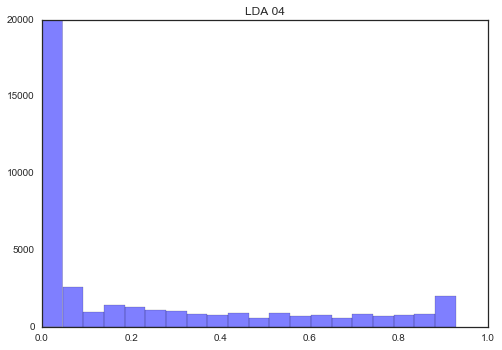

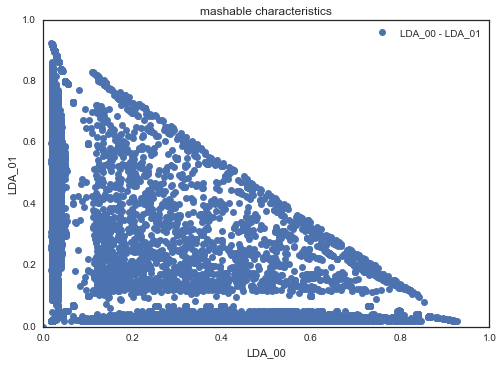

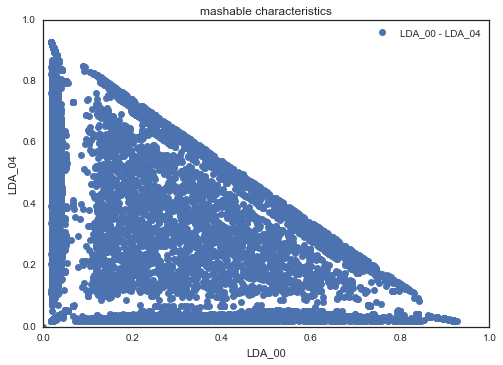

In [22]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... LDA plots
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

num_bins = 20
plt.hist(df1.LDA_00, num_bins, facecolor='blue', alpha=0.5)
plt.title('LDA 00')
plt.show()

num_bins = 20
plt.hist(df1.LDA_01, num_bins, facecolor='slateblue', alpha=0.5)
plt.title('LDA 01')
plt.show()

num_bins = 20
plt.hist(df1.LDA_02, num_bins, facecolor='mediumorchid', alpha=0.5)
plt.title('LDA 02')
plt.show()

num_bins = 20
plt.hist(df1.LDA_03, num_bins, facecolor='blue', alpha=0.5)
plt.title('LDA 03')
plt.show()

num_bins = 20
plt.hist(df1.LDA_04, num_bins, facecolor='blue', alpha=0.5)
plt.title('LDA 04')
plt.show()

plt.plot(df1.LDA_00, df1.LDA_01, label = 'LDA_00 - LDA_01', linestyle = 'None', marker = 'o')
plt.xlabel('LDA_00')
plt.ylabel('LDA_01')
plt.title('mashable characteristics')
plt.legend()
plt.show()

plt.plot(df1.LDA_00, df1.LDA_04, label = 'LDA_00 - LDA_04', linestyle = 'None', marker = 'o')
plt.xlabel('LDA_00')
plt.ylabel('LDA_04')
plt.title('mashable characteristics')
plt.legend()
plt.show()



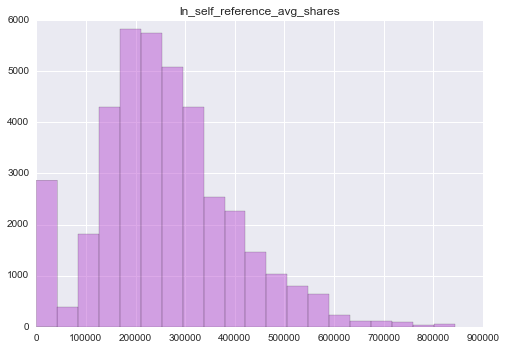

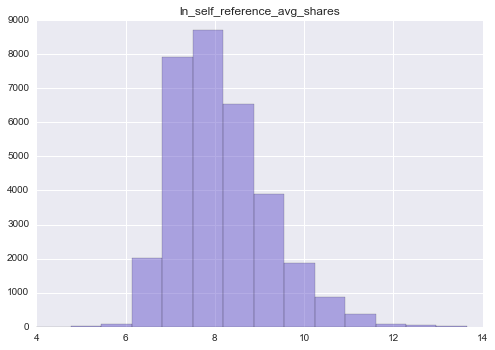

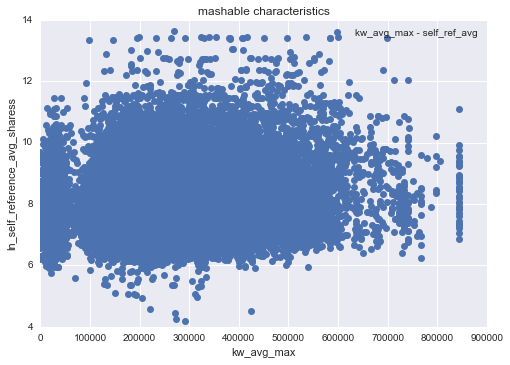

In [12]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... Keywords visualizations
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
import numpy as np

num_bins = 20
plt.hist(df1.kw_avg_max, num_bins, facecolor='mediumorchid', alpha=0.5)
plt.title('ln_self_reference_avg_shares')
plt.show()

df1.log_self_share = np.log(df1['self_reference_avg_sharess'] + 1)
axes = plt.gca()
axes.set_xlim([4,14])
num_bins = 20
plt.hist(df1.log_self_share, num_bins, facecolor='slateblue', alpha=0.5)
plt.title('ln_self_reference_avg_shares')
plt.show()

axes = plt.gca()
axes.set_ylim([4,14])
plt.plot(df1.kw_avg_max, df1.log_self_share, label = 'kw_avg_max - self_ref_avg', linestyle = 'None', marker = 'o')
plt.xlabel('kw_avg_max')
plt.ylabel('ln_self_reference_avg_sharess')
plt.title('mashable characteristics')
plt.legend()
plt.show()

***  

### Explore Attributes and Class  

#### Identify and explain interesting relationships between features and dependent variable popularity.  

- In this case, the dependent variable, _popularity_, is a binary value : Yes or No

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
dataset2 = pd.read_csv('C:/DataScience/Stats3/OnlineNewPopularityTransformed.csv') 

#### Popularity by data channel

In [ ]:
sb.factorplot("popularity", col="channel", col_wrap=4,data=dataset,kind="count", size=2.5, aspect=.8)
plt.show()

- From the above plots, it is evident that World channel has highest count of occurrence, while Social Media and Lifestyle have least frequency of occurrence.  
- Interestingly, from a percentage basis within each _data_channel_ category, the World category has approximately equal percentages of Yes/No values, while the Technology channel and Entertainment channels have higher level of discrimination between Yes/No level of sharing. This provides, likley, some predictive capability for the channels that exhibit the differentiation in Yes/No percentages within that channel.  

***  

#### Number of videos in content

- Does number of videos matter ?  
- Social media distributions show a positive correlation with number of videos  
- The remainder of the data channels do not show an appreciable difference in True/False (Yes/No) responses to the number of videos.
- In this case, we present the num_videos values on ln(num_videos) scale, due to the very wide range of number of videos in the experience set, and also, the generally highly right-skewed characteristics of those distributions.


In [ ]:
sb.stripplot(x='data_channel',y='ln_num_videos',data=dataset2,hue='popularity', split=True,palette="Accent");
plt.show()

#### online behaviour on mashable by day of week  

- Does day of week that the article was published have an influence on the eventual number of shares for that article ?  

In [ ]:
sb.factorplot("popularity", col="day", col_wrap=4,data=dataset,kind="count", size=2.5, aspect=.8,palette="Set2")
plt.show()

- The plots above indicates that the activity on mashable is low over weekends.  
- Articles published during weekends are less likely to be shared than published mid-week.
- However, there is also a more definitive differentiation between Yes/No dependent variable for the weekend published articles - weekend published articles are also proportionally less likely to be shared.

#### Does having images have an impact on popularity?  

- Lets plot it out!

In [ ]:
sb.violinplot(x='data_channel',y='ln_num_imgs',data=dataset2,hue='popularity', split=True,palette="Set1");
plt.show()

Violin plots above by data channel shows there is some impact on images on popularity. Social media contents with images around exponential 1 to 2 is evenly positioned for popularity.
whereas, business popularity increase with images. 

content with images is highly populary in lifestyle channel compared to other channels.  

Lets look at images impact by day of week.  

In [ ]:
sb.stripplot(x='day_of_week',y='ln_num_imgs',data=dataset2,hue='popularity', split=True,palette="spring");
plt.show()

Above plot suggest that images are popular more during weekend compared to week days, which correlates well with lifestyle getting more activity over weekend than weekdays and the fact that lifestyle popularity increases with more images.

***  

#### Moving on to Key words ...  
- How important is it to have buzz words to influence people to share?

In [ ]:
sb.violinplot(x='data_channel',y='num_keywords',data=dataset2, hue='popularity', split=True,scale='count');
plt.show()

obviously important, very clearly dependent on industry. Social media is full of buzz words,higher the key words very influencial on people. World channel reflects to show more key words no likely popular. Overall, key words is a very good indicator for popularity, data channel and key words combined is a good predictor variable.  

*** 

#### Next, how long is the title?  

In [ ]:
sb.set(style="ticks")
sb.boxplot(x='channel',y='n_tokens_title',data=dataset,hue = 'popularity', palette="seismic" )
sb.despine(offset=10, trim=True)
plt.show()

on an average titles are group of 10 to 15 words. There are exceptions to few titles being very long or very short. Looking at the plot, it does not seem a influence on popularity. We can however note that entertainment is usually 10 words or more.  

***  


#### New Features  

New features have been added to data analysis. 

1. data_Channel:<br>
•	Business<br>
•	Entertainment<br>
•	LifeStyle<br>
•	Social Media<br>
•	Technology<br>
•	World<br>

above variables are derived using the corresponding data_channel indicators.

2. day_of_week:<br>
•	Mon<br>
•	Tue<br>
•	Wed<br>
•	Thu<br>
•	Fri<br>
•	Sat<br>
•	Sun<br>

above variables are derived using weekday_is_monday thru weekday_is_sunday in the original dataset.

# Exceptional work

For exceptional work a logistic regression is done to predict if a url is popular based on the threshold of 1400 shares.

To prepare the dataset for the regression some object and date type variables are removed.

In [20]:
df2 = df1.drop(['publish_date', 'title', 'data_channel', 'day_of_week', 'year', 'month', 'day'], axis = 1)

## Training and Testing Split


For training and testing purposes, we use 80% of the observations for training and 20% for testing. This process is repeated three times and use the hold out cross validation method built into scikit-learn.

In [21]:
from sklearn.model_selection import ShuffleSplit

if 'popularity' in df2:
    y = df2['popularity'].values
    del df2['popularity']
    X = df2.values
    
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                        test_size = 0.2)

print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


The next bit of code creates the logistic regression model and for each iteration it fit the model to the train and test splits.

The output shows the accuracy and confusion matrix for each iteration.

In [147]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf

model = LogisticRegression()

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    model.fit(X_train, y_train)  # train object
    y_hat = model.predict(X_test) # get test set precitions
    print("====Iteration",iter_num," ====")
    print("accuracy", acc(y_test, y_hat) )
    print("confusion matrix\n", conf(y_test, y_hat))
    iter_num+=1
    

====Iteration 0  ====
accuracy 0.638415941481
confusion matrix
 [[2653 1309]
 [1558 2409]]
====Iteration 1  ====
accuracy 0.633371169126
confusion matrix
 [[2572 1476]
 [1431 2450]]
====Iteration 2  ====
accuracy 0.644721906924
confusion matrix
 [[2645 1334]
 [1483 2467]]


It would also be useful to know how each variable ended up weighted in the regression model.  The next bit of code does just that, outputting a list of each variable and weight.

In [148]:
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train)
X_test_scaled = scl_obj.transform(X_test)

lr_clf = LogisticRegression(penalty='l2', C=0.05)
lr_clf.fit(X_train_scaled, y_train)

y_het = lr_clf.predict(X_test_scaled)

zip_vars = zip(lr_clf.coef_.T,df2.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out
    

data_channel_is_entertainment has weight of -0.200818261527
LDA_02 has weight of -0.179252400272
ln_n_tokens_content has weight of -0.151802824788
data_channel_is_bus has weight of -0.118200536595
num_imgs has weight of -0.107045614671
weekday_is_tuesday has weight of -0.0751281379558
num_videos has weight of -0.0743249827437
weekday_is_wednesday has weight of -0.0727678289684
weekday_is_thursday has weight of -0.0571603054579
data_channel_is_world has weight of -0.0521262960447
LDA_01 has weight of -0.0349582026107
avg_negative_polarity has weight of -0.0252714121865
weekday_is_monday has weight of -0.0209489058556
n_tokens_title has weight of -0.0190244243078
global_rate_negative_words has weight of 0.000321383808084
data_channel_is_lifestyle has weight of 0.0119431776524
weekday_is_friday has weight of 0.0216384514021
ln_num_hrefs has weight of 0.0299145790018
global_rate_positive_words has weight of 0.0323249565375
abs_title_subjectivity has weight of 0.0388612195942
num_hrefs has 

The weights listed above are useful but a visualization would make digestion of the information easier. The bar chart below shows the weighting of each variable in the regression. The absolute value or magnitude are what is important here.

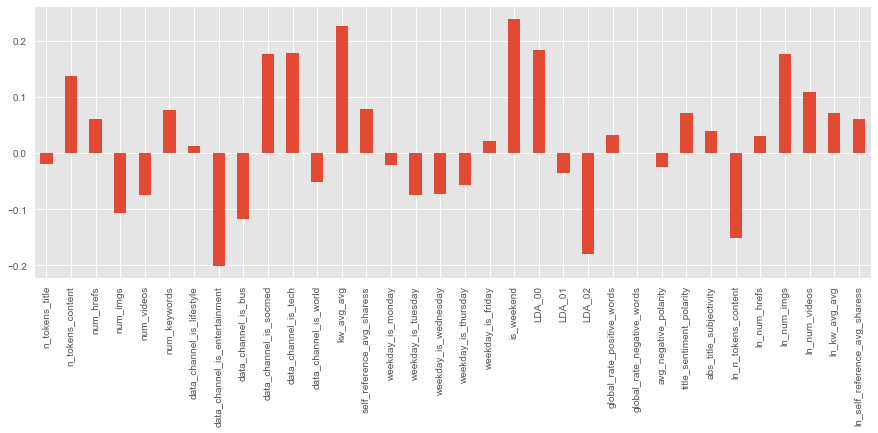

In [149]:
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0], index = df2.columns)
weights.plot(kind = 'bar')
plt.show()

# Dimensionality Reduction

In [150]:
from pandas.tools.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [155]:
pca = PCA(n_components=5)
X_pca = pca.fit(X).transform(X)


print('pca:', pca.components_)

pca: [[  5.78472694e-08  -2.69546335e-04   1.18389903e-05   7.19586786e-06
    5.86072986e-06   2.48365058e-07  -3.41960582e-08  -4.13789419e-07
   -5.87582381e-08   2.34541687e-07   2.57114737e-07  -8.25484214e-07
    9.20429997e-03   9.99957602e-01  -1.46313859e-08   6.00141678e-09
    3.29687488e-08   8.35376807e-10   4.70412862e-08  -7.22154427e-08
    8.30821506e-08  -1.60476216e-07  -5.70327623e-07   7.12817638e-09
    9.38005323e-09  -2.85517745e-07   1.03931587e-08  -1.13398100e-08
    1.17485707e-06   1.01431458e-06   1.07211217e-06   1.04328746e-06
    2.02301777e-06   3.75496018e-05]
 [  6.54690827e-06  -3.26806517e-02   9.91495865e-04   8.92183612e-04
    3.19552844e-04   3.33474098e-05   8.89155216e-06   3.22299040e-06
   -1.69817285e-05   2.22495121e-06  -4.36192072e-05  -7.44210453e-05
    9.99422403e-01  -9.20821072e-03  -5.93504304e-06  -1.19372442e-06
   -4.32342275e-06  -1.20038511e-06   8.11958065e-07   1.18406173e-05
   -7.94231406e-06   2.15379296e-06  -5.81726175